# Querying the Alyx database and downloading data

Boilerplate import code: only builtin and common modules in Python and scientific Python.

In [1]:
from getpass import getpass
from io import BytesIO
import os.path as op
import requests

from IPython.display import JSON, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def download(url):
    with BytesIO() as f:
        f.write(requests.get(url, auth=('ibl', FLATIRONPWD)).content)
        f.seek(0)
        return np.load(f)

The base URL for the REST endpoints.

In [3]:
BASEURL = "https://alyx-dev.cortexlab.net"
#BASEURL = "http://localhost:8000"

We query the Alyx password, and the HTTP flatiron password.

In [4]:
ALYXPWD = getpass()

In [5]:
FLATIRONPWD = getpass()

## First steps with the REST API

We use the standard `requests` module to make HTTP requests to the endpoints.

In [20]:
requests.get(BASEURL)

<Response [200]>

In [21]:
requests.get(BASEURL).text

'{"datasets-url":"https://alyx-dev.cortexlab.net/datasets","exp-metadata-url":"https://alyx-dev.cortexlab.net/exp-metadata","sessions-url":"https://alyx-dev.cortexlab.net/sessions","users-url":"https://alyx-dev.cortexlab.net/users","water-restricted-subjects-url":"https://alyx-dev.cortexlab.net/water-restricted-subjects","weighings-url":"https://alyx-dev.cortexlab.net/weighings","water-administrations-url":"https://alyx-dev.cortexlab.net/water-administrations","dataformat-url":"https://alyx-dev.cortexlab.net/data-formats","dataset-types-url":"https://alyx-dev.cortexlab.net/dataset-types","timescales-url":"https://alyx-dev.cortexlab.net/timescales","datarepositorytype-url":"https://alyx-dev.cortexlab.net/data-repository-type","water-requirement-url":"https://alyx-dev.cortexlab.net/water-requirement/","files-url":"https://alyx-dev.cortexlab.net/files","register-file":"https://alyx-dev.cortexlab.net/register-file","datarepository-url":"https://alyx-dev.cortexlab.net/data-repository","subj

In [22]:
requests.get(BASEURL).json()

{'datasets-url': 'https://alyx-dev.cortexlab.net/datasets',
 'exp-metadata-url': 'https://alyx-dev.cortexlab.net/exp-metadata',
 'sessions-url': 'https://alyx-dev.cortexlab.net/sessions',
 'users-url': 'https://alyx-dev.cortexlab.net/users',
 'water-restricted-subjects-url': 'https://alyx-dev.cortexlab.net/water-restricted-subjects',
 'weighings-url': 'https://alyx-dev.cortexlab.net/weighings',
 'water-administrations-url': 'https://alyx-dev.cortexlab.net/water-administrations',
 'dataformat-url': 'https://alyx-dev.cortexlab.net/data-formats',
 'dataset-types-url': 'https://alyx-dev.cortexlab.net/dataset-types',
 'timescales-url': 'https://alyx-dev.cortexlab.net/timescales',
 'datarepositorytype-url': 'https://alyx-dev.cortexlab.net/data-repository-type',
 'water-requirement-url': 'https://alyx-dev.cortexlab.net/water-requirement/',
 'files-url': 'https://alyx-dev.cortexlab.net/files',
 'register-file': 'https://alyx-dev.cortexlab.net/register-file',
 'datarepository-url': 'https://aly

By default, the base URL shows the list of available endpoints.

Let's see the list of users:

In [23]:
JSON(requests.get(BASEURL + "/users").json())

<IPython.core.display.JSON object>

Let's see the details of one user:

In [24]:
JSON(requests.get(BASEURL + "/users/miles").json())

<IPython.core.display.JSON object>

And the details of one subject:

In [25]:
requests.get(BASEURL + "/subjects/Ryztinge").json()

{'detail': 'Authentication credentials were not provided.'}

An error is raised! We are not yet authenticated.

## REST authentication

To authenticate, we need to make a request to the `/auth-token` endpoint with our username and password, and retrieve an **authorization token**.

In [ ]:
requests.post(BASEURL + '/auth-token', data=dict(username='cyrille', password=ALYXPWD)).json()

In [ ]:
token = _['token']
token

In [28]:
def get(url):
    return JSON(requests.get(url, headers={"Authorization": "Token " + token}).json())

In [29]:
get(BASEURL + "/subjects")

<IPython.core.display.JSON object>

## Querying existing dataset types

In [30]:
get(BASEURL + '/dataset-types')

<IPython.core.display.JSON object>

## Searching sessions with specific dataset types

In [31]:
get(BASEURL + '/sessions?dataset_types=wheel.position')

<IPython.core.display.JSON object>

## Downloading the data

In [32]:
pos = download("http://ibl.flatironinstitute.org/cortexlab/Subjects/MW48/2018-04-19/1/Wheel.position.a3ac23dc-edf0-45c7-892d-cc65958fa361.npy")
time = download("http://ibl.flatironinstitute.org/cortexlab/Subjects/MW48/2018-04-19/1/Wheel.timestamps.6b2909fa-f775-45a7-9712-a105eeab3fdc.npy")
velocity = download("http://ibl.flatironinstitute.org/cortexlab/Subjects/MW48/2018-04-19/1/Wheel.velocity.121ccf4c-37c8-407a-a7c9-7037460914d0.npy")

## Plotting the data

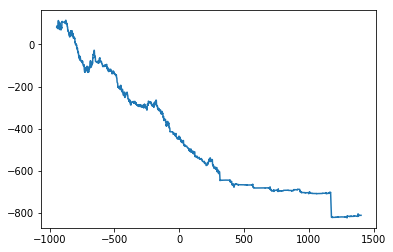

In [33]:
plt.plot(time[:, 1], pos)